# Moving, rotating, mirroring

There are several actions we can take to move and rotate PHIDL objects.  These actions include movement, rotation, and reflection. There are several types of PHIDL objects (`Device`, `DeviceReference`, `Port`, `Polygon`, `CellArray`, `Label`, and `Group`) but they all can be moved and manipulated in the same ways.

## Basic movement and rotation

We'll start by creating a blank Device and some shapes.  We'll add the shapes to the Device as references

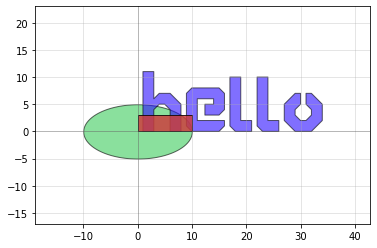

In [1]:
import phidl.geometry as pg
from phidl import quickplot as qp
from phidl import Device

# Start with a blank Device
D = Device()

# Create some more shape Devices
T = pg.text('hello', size = 10, layer = 1)
E = pg.ellipse(radii = (10,5))
R = pg.rectangle(size = (10,3), layer = 2)

# Add the shapes to D as references
text = D << T
ellipse = D << E
rect1 = D << R
rect2 = D << R

qp(D) # quickplot it!

Now let's practice moving and rotating the objects:

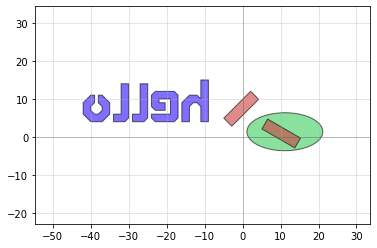

In [2]:
text.move([10,4]) # Translate by dx = 10, dy = 4
ellipse.move(origin = [1,1], destination = [2,2.5]) # Translate by dx = 1, dy = 1.5
rect1.move([1,1], [5,5], axis = 'y') # Translate by dx = 0, dy = 4 (motion only along y-axis)
rect2.movey(4) # Same as specifying axis='y' in the move() command
rect2.movex(4) # Same as specifying axis='x'' in the move() command
ellipse.movex(30,40) # Moves "from" x=30 "to" x=40 (i.e. translates by dx = 10)

rect1.rotate(45) # Rotate the first waveguide by 45 degrees around (0,0)
rect2.rotate(-30, center = [1,1]) # Rotate the second waveguide by -30 degrees around (1,1)

text.mirror(p1 = [1,1], p2 = [1,3]) # Reflects across the line formed by p1 and p2

qp(D) # quickplot it!

## Working with properties

Each Device and DeviceReference object has several properties which can be used to learn information about the object (for instance where it's center coordinate is).  Several of these properties can actually be used to move the geometry by assigning them new values.

Available properties are:

- `xmin` / `xmax`: minimum and maximum x-values of all points within the object
- `ymin` / `ymax`: minimum and maximum y-values of all points within the object
- `x`: centerpoint between minimum and maximum x-values of all points within the object
- `y`: centerpoint between minimum and maximum y-values of all points within the object
- `bbox`: bounding box (see note below) in format ((xmin,ymin),(xmax,ymax))
- `center`: center of bounding box

In [3]:
print('bounding box:')
print(text.bbox) # Will print the bounding box of text in terms of [(xmin, ymin), (xmax, ymax)]
print('xsize and ysize:')
print(text.xsize) # Will print the width of text in the x dimension
print(text.ysize) # Will print the height of text in the y dimension
print('center:')
print(text.center) # Gives you the center coordinate of its bounding box
print('xmax')
print(ellipse.xmax) # Gives you the rightmost (+x) edge of the ellipse bounding box

bounding box:
[[-42.   4.]
 [ -9.  15.]]
xsize and ysize:
33.0
11.0
center:
[-25.5   9.5]
xmax
21.0


Let's use these properties to manipulate our shapes to arrange them a little better

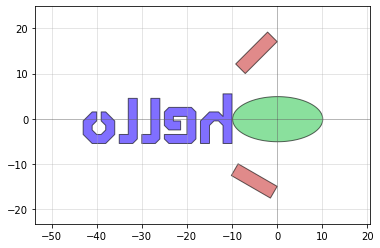

In [4]:
# First let's center the ellipse
ellipse.center = [0,0] # Move the ellipse such that the bounding box center is at (0,0)

# Next, let's move the text to the left edge of the ellipse
text.y = ellipse.y # Move the text so that its y-center is equal to the y-center of the ellipse
text.xmax = ellipse.xmin # Moves the ellipse so its xmax == the ellipse's xmin

# Align the right edge of the rectangles with the x=0 axis
rect1.xmax = 0
rect2.xmax = 0

# Move the rectangles above and below the ellipse
rect1.ymin = ellipse.ymax + 5
rect2.ymax = ellipse.ymin - 5

qp(D)

In addition to working with the properties of the references inside the Device, we can also manipulate the whole Device if we want.  Let's try mirroring the whole Device `D`:

10.0


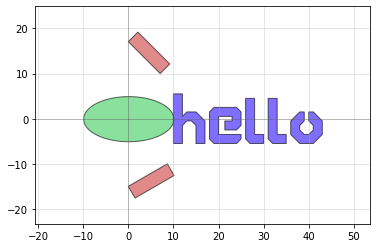

In [5]:
print(D.xmax) # Prints out '10.0'

D.mirror((0,1)) # Mirror across line made by (0,0) and (0,1)

qp(D)

### A note about bounding boxes

When we talk about bounding boxes, we mean it in the sense of the smallest enclosing box which contains all points of the geometry.  So the bounding box for the device D looks like this:

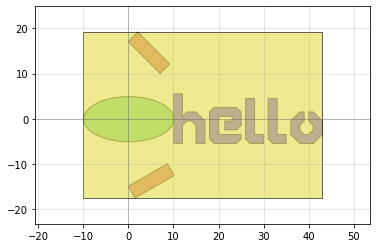

In [6]:
# The phidl.geometry library has a handy bounding-box function
# which takes a bounding box and creates a rectangle shape for it
device_bbox = D.bbox
D << pg.bbox(device_bbox, layer = 3)

qp(D)

When we query the properties of D, they will be calculated with respect to this bounding-rectangle.  For instance:

In [7]:
print('Center of Device D:')
print(D.center)

print('X-max of Device D:')
print(D.xmax)

Center of Device D:
[16.5         0.79715597]
X-max of Device D:
43.0


## Chaining commands

Many of the movement/manipulation functions return the object they manipulate.  We can use this to chain multiple commands in a single line.

For instance these two expressions:

```
rect1.rotate(angle = 37)
rect1.move([10,20])
```

...are equivalent to this single-line expression

```
rect1.rotate(angle = 37).move([10,20])
```